In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("./train.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### let's start by analysing the data

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

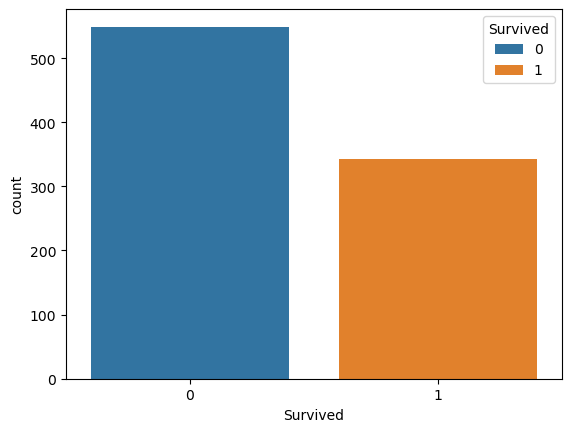

In [7]:
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_train, ax=ax, hue="Survived")

<Axes: xlabel='Survived', ylabel='count'>

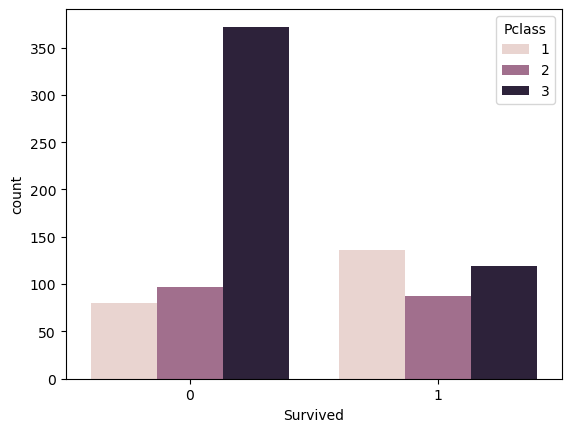

In [8]:
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_train, ax=ax, hue="Pclass")

In [9]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
# Get title counts
title_counts = df_train['Title'].value_counts()

# Titles to keep (count >= 5)
titles_to_keep = title_counts[title_counts >= 5].index

# Filter dataframe to keep only rows with common titles
df_train = df_train[df_train['Title'].isin(titles_to_keep)]

KeyError: 'Title'

In [ ]:
df_train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


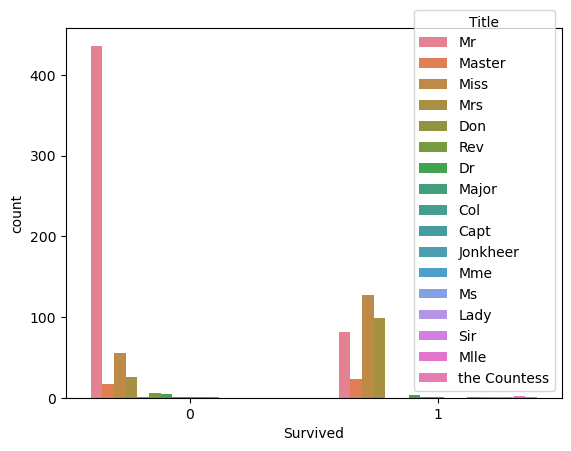

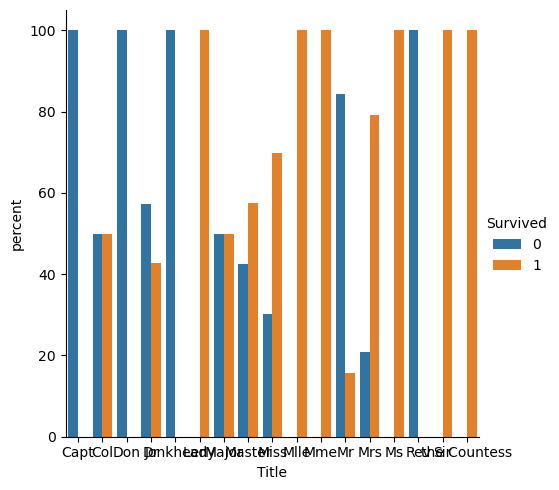

In [ ]:
import re

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# See unique titles
print(df_train['Title'].unique())

# Now you can plot by Title
f,ax = plt.subplots(1,1)
sns.countplot(x="Survived", data=df_train, ax=ax, hue="Title")

x,y = 'Title', 'Survived'
(df_train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

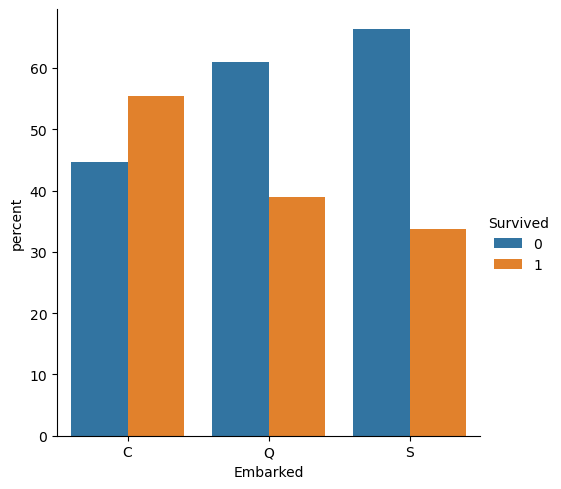

In [ ]:
x,y = 'Embarked', 'Survived'
(df_train
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

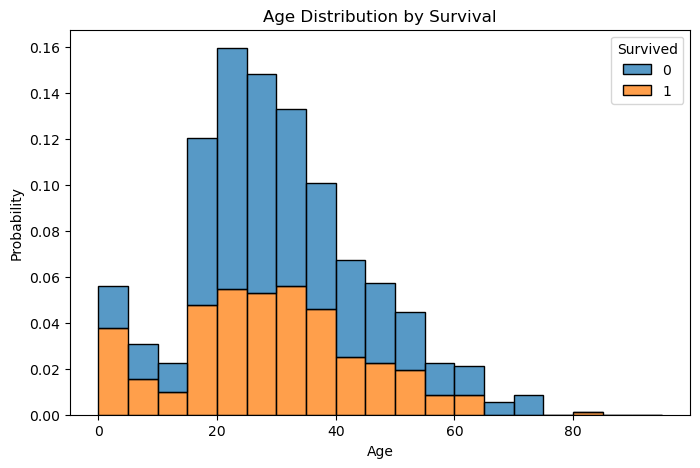

In [ ]:
# Plot the distribution of Age with respect to Survived
f, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.histplot(data=df_train, x="Age", hue="Survived", multiple="stack", bins=np.arange(0,100,5), ax=ax, stat="probability")
ax.set_title("Age Distribution by Survival")
plt.show()

C:\Users\pietr\AppData\Local\Temp\ipykernel_14436\4205481785.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby('AgeBin')['Survived']


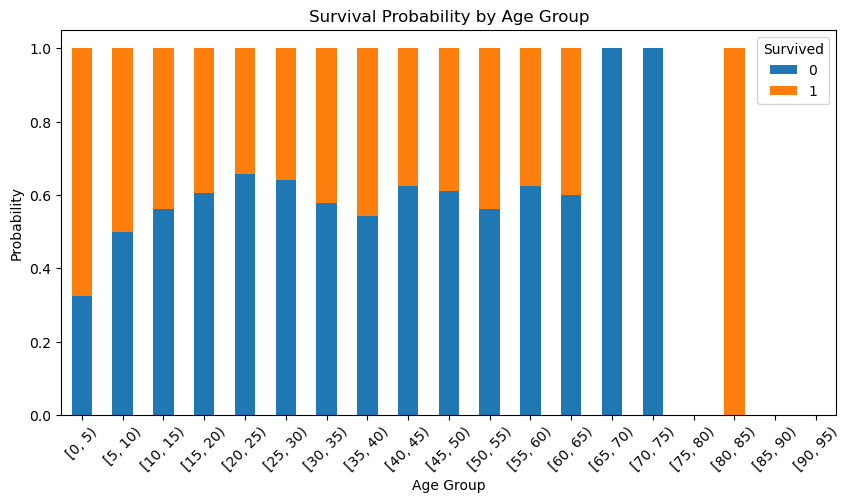

In [11]:
# Bin the ages
age_bins = np.arange(0, 100, 5)
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=age_bins, right=False)

# Compute normalized survival distribution per bin
age_survival = (
    df_train.groupby('AgeBin')['Survived']
    .value_counts(normalize=True)
    .rename("Probability")
    .reset_index()
)

# Pivot to get columns for each Survived value
pivoted = age_survival.pivot(index="AgeBin", columns="Survived", values="Probability").fillna(0)

# Plot stacked bars (each bar sums to 1)
pivoted.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5)
)

plt.title("Survival Probability by Age Group")
plt.ylabel("Probability")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Survived")
plt.show()


In [12]:
set([i[0] for i in df_train.Cabin if isinstance(i, str)])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import re

df_train = pd.read_csv("./train.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_train['Title'] = df_train['Title'].map(title_map).fillna("Rare")

# Encode as integers
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}

X = df_train.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
X['Cabin'] = df_train['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)
title_encoding = {title: i for i, title in enumerate(df_train['Title'].unique())}
X['Title'] = df_train['Title'].apply(lambda x: title_encoding.get(x, 0) if pd.notnull(x) else 0)
X['Ticket'] = df_train['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X = X.dropna()
y = X['Survived']
X = X.drop('Survived', axis=1)
X = X.drop("PassengerId", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

C:\Users\pietr\AppData\Local\Temp\ipykernel_14436\3202912099.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_14436\3202912099.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)


LogisticRegression(max_iter=1000)

In [17]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,1,22.0,1,0,1,7.2500,0,3.0,0
1,1,0,38.0,1,0,1,71.2833,3,1.0,1
2,3,0,26.0,0,0,1,7.9250,0,3.0,2
3,1,0,35.0,1,0,0,53.1000,3,3.0,1
4,3,1,35.0,0,0,0,8.0500,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0,13.0000,0,3.0,4
887,1,0,19.0,0,0,0,30.0000,2,3.0,2
888,3,0,28.0,1,2,1,23.4500,0,3.0,2
889,1,1,26.0,0,0,0,30.0000,3,1.0,0


In [18]:
y_pred = model.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Confusion Matrix:
 [[476  73]
 [ 94 248]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.77      0.73      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [24]:
df_test = pd.read_csv("./test.csv")

# Extract title from Name column
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_test['Title'] = df_test['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}

df_test['Title'] = df_test['Title'].map(title_map).fillna("Rare")

X = df_test.drop("Name", axis=1)
X.replace({'Sex': {'female': True, 'male': False}}, inplace=True)
X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)
cabin_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
X['Cabin'] = df_test['Cabin'].apply(lambda x: cabin_map.get(str(x)[0], 0) if pd.notnull(x) else 0)
title_encoding = {title: i for i, title in enumerate(df_test['Title'].unique())}
X['Title'] = df_test['Title'].apply(lambda x: title_encoding.get(x, 0) if pd.notnull(x) else 0)
X['Ticket'] = df_test['Ticket'].apply(lambda ticket: 0 if ticket.isdigit() else 1)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X.replace({'Fare': {np.nan:np.nanmedian(X.Fare)}}, inplace=True)
pid = X["PassengerId"]
X = X.drop("PassengerId", axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\pietr\AppData\Local\Temp\ipykernel_14436\2601196689.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': True, 'male': False}}, inplace=True)
C:\Users\pietr\AppData\Local\Temp\ipykernel_14436\2601196689.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Embarked': {'C': 1, 'Q': 2, "S":3, np.nan:3}}, inplace=True)


In [27]:
y_pred = model.predict(X_scaled)

N = len(pid)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (pid[i], y_pred[i])

np.savetxt("./logistic_submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

In [104]:
df_train = pd.read_csv("./train.csv")

# --- Extract Title from Name ---
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_train['Title'] = df_train['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}
df_train['Title'] = df_train['Title'].map(title_map).fillna("Rare")

# Feature: Does the alphabetic part of the name end with a vowel?
def ends_with_vowel(name):
    # Extract only alphabetic characters from the name
    alpha = ''.join([c for c in name if c.isalpha()])
    return alpha[-1].lower() in 'aeiou' if alpha else False

df_train['NameEndsWithVowel'] = df_train['Name'].apply(ends_with_vowel)

# --- Feature engineering ---
X = df_train.drop("Name", axis=1)

# Sex → categorical
# Embarked → fill missing with most common ('S')
X['Embarked'] = X['Embarked'].fillna('S')

# Cabin → keep first letter, Unknown if missing
X['Cabin'] = df_train['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')

# Ticket → numeric vs. alphanumeric
X['Ticket'] = df_train['Ticket'].apply(lambda t: 'Numeric' if t.isdigit() else 'Alphanumeric')

# Age → fill missing with median
X['Age'] = X['Age'].fillna(X['Age'].median())

# Fare → replace fare with log(fare)
X['logFare'] = np.log(X['Fare'])
X["logFare"] = X["logFare"].replace(-np.inf, 0)  # Handle log(0) if any

#number of family members aboard
X['FamilySize'] = X['Parch'] + X['SibSp']

# Target variable
y = X['Survived']

# Drop unneeded columns
X = X.drop(['Survived', 'PassengerId', 'Parch', 'SibSp', "Fare"], axis=1)

# Dummy encode all categorical features
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Cabin', 'Title', 'Ticket'], drop_first=True)

# Final feature matrix
X_training = X.copy()


c:\Users\pietr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [105]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_training, y)

y_pred_dt = dt_model.predict(X_training)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_dt))
print("\nClassification Report:\n", classification_report(y, y_pred_dt))

importances = dt_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)

Confusion Matrix:
 [[548   1]
 [  9 333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       1.00      0.97      0.99       342

    accuracy                           0.99       891
   macro avg       0.99      0.99      0.99       891
weighted avg       0.99      0.99      0.99       891

Title_Mr             0.310018
logFare              0.248590
Age                  0.184585
FamilySize           0.097234
Pclass               0.048263
Title_Rare           0.028152
Ticket_Numeric       0.016337
Cabin_D              0.016282
NameEndsWithVowel    0.015375
Embarked_S           0.006881
Cabin_Unknown        0.006422
Embarked_Q           0.006097
Cabin_E              0.004289
Cabin_B              0.003573
Sex_male             0.003252
Cabin_C              0.002032
Title_Miss           0.001484
Title_Mrs            0.001064
Cabin_F              0.000068
Cabin_G              0.000000
Cabin_

In [106]:
# Set your importance threshold
importance_threshold = 0.005

# Get features above threshold
important_features = feat_importance[feat_importance > importance_threshold].index.tolist()

# Subset training data
X_trimmed = X_training[important_features]

# Retrain DecisionTree on trimmed features
dt_model_trimmed = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
dt_model_trimmed.fit(X_trimmed, y)

# Evaluate
y_pred_trimmed = dt_model_trimmed.predict(X_trimmed)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_trimmed))
print("\nClassification Report:\n", classification_report(y, y_pred_trimmed))
print("Used features:", important_features)

Confusion Matrix:
 [[528  21]
 [ 55 287]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.93      0.84      0.88       342

    accuracy                           0.91       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.92      0.91      0.91       891

Used features: ['Title_Mr', 'logFare', 'Age', 'FamilySize', 'Pclass', 'Title_Rare', 'Ticket_Numeric', 'Cabin_D', 'NameEndsWithVowel', 'Embarked_S', 'Cabin_Unknown', 'Embarked_Q']


In [107]:
len(important_features)

12

In [108]:
df_test = pd.read_csv("./test.csv")

df_test['Title'] = df_test['Name'].apply(extract_title)
df_test['Title'] = df_test['Title'].map(title_map).fillna("Rare")
df_test['NameEndsWithVowel'] = df_test['Name'].apply(ends_with_vowel)
X = df_test.drop("Name", axis=1)

X['Embarked'] = X['Embarked'].fillna('S')
X['Cabin'] = df_test['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')
X['Ticket'] = df_test['Ticket'].apply(lambda t: 'Numeric' if t.isdigit() else 'Alphanumeric')
X['Age'] = X['Age'].fillna(X['Age'].median())
X['logFare'] = np.log(X['Fare'])
X["logFare"] = X["logFare"].replace(-np.inf, 0)  # Handle log(0) if any
X['FamilySize'] = X['Parch'] + X['SibSp']

pid = X["PassengerId"]
X = X.drop(['PassengerId', 'Parch', 'SibSp', "Fare"], axis=1)
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Cabin', 'Title', 'Ticket'], drop_first=True)

train_cols = X_training.columns

# Add missing columns to test set, fill with False
for col in train_cols:
    if col not in X.columns:
        X[col] = False

# Drop extra columns in test set not present in training set
for col in X.columns:
    if col not in train_cols:
        X = X.drop(col, axis=1)

# Reorder columns to match training set
X = X[train_cols]

# Subset training data
X = X[important_features]
y_pred_dt = dt_model_trimmed.predict(X)

N = len(pid)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (pid[i], y_pred_dt[i])

np.savetxt("./dt_submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

c:\Users\pietr\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
X

,Pclass,Age,NameEndsWithVowel,logFare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Unknown,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Ticket_Numeric
0,3,34.5,False,2.057860,0,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True
1,3,47.0,False,1.945910,1,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
2,2,62.0,False,2.270836,0,True,True,False,False,False,False,False,False,False,True,False,True,False,False,True
3,3,27.0,False,2.159003,0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,True
4,3,22.0,False,2.508582,2,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,False,2.085672,0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False
414,1,39.0,True,4.690430,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
415,3,38.5,False,1.981001,0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False
416,3,27.0,False,2.085672,0,True,False,True,False,False,False,False,False,False,True,False,True,False,False,True


In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# 5-fold CV
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("CV accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

rf_model.fit(X_scaled, y)
y_pred_rf = rf_model.predict(X_scaled)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)

CV accuracy scores: [0.80446927 0.79213483 0.83707865 0.76966292 0.8258427 ]
Mean CV accuracy: 0.8058376749733226
Confusion Matrix:
 [[546   3]
 [ 10 332]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.99       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.99      0.99      0.99       891

Fare              0.247606
Age               0.234865
Title_Mr          0.130569
Sex_male          0.109244
Pclass            0.076110
Title_Miss        0.037056
Title_Mrs         0.033411
Cabin_Unknown     0.030486
Ticket_Numeric    0.022707
Embarked_S        0.021612
Embarked_Q        0.011291
Title_Rare        0.010420
Cabin_E           0.008820
Cabin_D           0.007384
Cabin_B           0.007118
Cabin_C           0.006387
Cabin_F           0.002553
Cabin_G           0.002084
Cabin_

In [ ]:
df_test = pd.read_csv("./test.csv")

# --- Extract Title from Name ---
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    if match:
        return match.group(1).strip()
    return ""

df_test['Title'] = df_test['Name'].apply(extract_title)

# Group rare titles
title_map = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Don": "Rare", "Rev": "Rare", "Dr": "Rare", "Mme": "Mrs",
    "Ms": "Miss", "Major": "Rare", "Lady": "Rare",
    "Sir": "Rare", "Mlle": "Miss", "Col": "Rare",
    "Capt": "Rare", "Countess": "Rare", "Jonkheer": "Rare",
    "Dona": "Rare"
}
df_test['Title'] = df_test['Title'].map(title_map).fillna("Rare")

# --- Feature engineering ---
X = df_test.drop("Name", axis=1)

# Sex → categorical
# Embarked → fill missing with most common ('S')
X['Embarked'] = X['Embarked'].fillna('S')

# Cabin → keep first letter, Unknown if missing
X['Cabin'] = df_test['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'Unknown')

# Ticket → numeric vs. alphanumeric
X['Ticket'] = df_test['Ticket'].apply(lambda t: 'Numeric' if t.isdigit() else 'Alphanumeric')

# Age → fill missing with median
X['Age'] = X['Age'].fillna(X['Age'].median())

# Target variable
pid = X['PassengerId']

# Drop unneeded columns
X = X.drop(['PassengerId', 'Parch', 'SibSp'], axis=1)

# Dummy encode all categorical features
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Cabin', 'Title', 'Ticket'], drop_first=True)

# Final feature matrix
X_scaled = X.copy()


In [181]:
N = len(pid)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (pid[i], y_pred_dt[i])

np.savetxt("./submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

### let's try a very simple submission

In [233]:
df_train = pd.read_csv("./train.csv")

X = df_train.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X.replace({'Fare': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X = X.drop(["PassengerId", "Parch", "SibSp", "Cabin", "Embarked", "Ticket", "Fare"], axis=1)
X = X.dropna()
y = X['Survived']
X = X.drop(["Survived"], axis=1)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, max_depth=5)

# 5-fold CV
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("CV accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importance)

C:\Users\pietr\AppData\Local\Temp\ipykernel_13680\2359901552.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)


CV accuracy scores: [0.74860335 0.80898876 0.78651685 0.78651685 0.80337079]
Mean CV accuracy: 0.7867993220764548
Confusion Matrix:
 [[500  49]
 [ 99 243]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       549
           1       0.83      0.71      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891

Sex       0.549416
Age       0.227371
Pclass    0.223213
dtype: float64


In [237]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [4, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 10} 0.8081099742640137


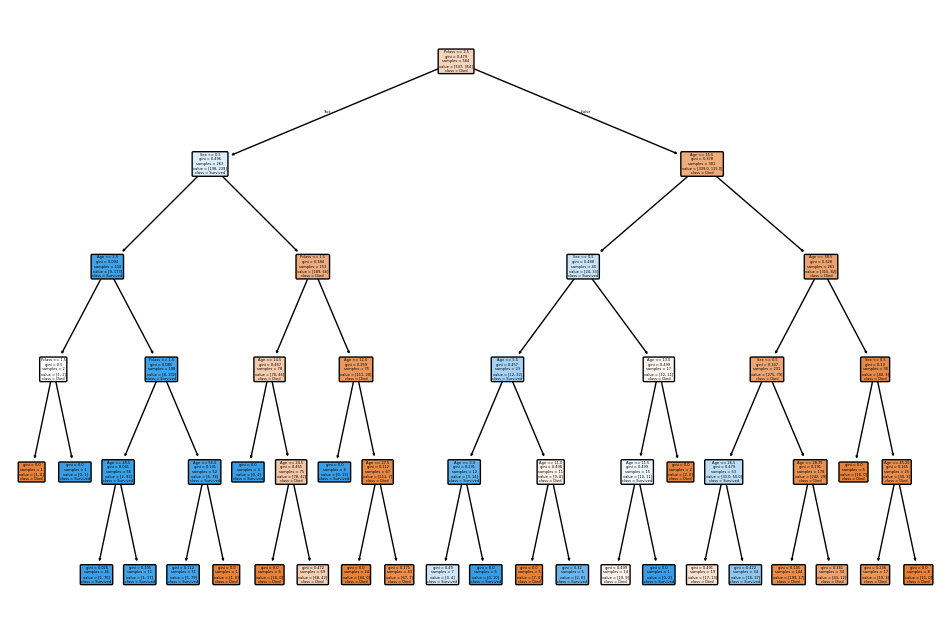

In [230]:
from sklearn import tree
estimator = rf_model.estimators_[0]

# Plot it
plt.figure(figsize=(12,8))
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=['Died','Survived'],
    filled=True,
    rounded=True
)
plt.show()

In [231]:
df_test = pd.read_csv("./test.csv")

X = df_test.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
X.replace({'Age': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
X.replace({'Fare': {np.nan:np.nanmedian(X.Age)}}, inplace=True)
pid = X["PassengerId"]
X = X.drop(["PassengerId", "Parch", "SibSp", "Cabin", "Embarked", "Ticket", "Fare"], axis=1)

y_pred_rf = rf_model.predict(X)

N = len(pid)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (pid[i], y_pred_rf[i])

np.savetxt("./simple_submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

C:\Users\pietr\AppData\Local\Temp\ipykernel_13680\3613355969.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)


## an even more basic one now...

In [111]:
df_train = pd.read_csv("./train.csv")

X = df_train.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
y = X['Survived']
X = X.drop(["PassengerId", 'Survived', "Parch", "SibSp", "Cabin", "Embarked", "Ticket", "Fare", "Age", "Pclass"], axis=1)
X = X.dropna()

rf_model = RandomForestClassifier(random_state=42)

# 5-fold CV
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("CV accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_rf))
print("\nClassification Report:\n", classification_report(y, y_pred_rf))

df_test = pd.read_csv("./test.csv")

X = df_test.drop("Name", axis=1)
X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
pid = X["PassengerId"]
X = X.drop(["PassengerId", "Parch", "SibSp", "Cabin", "Embarked", "Ticket", "Fare", "Age", "Pclass"], axis=1)

y_pred_rf = rf_model.predict(X)

N = len(pid)
x = np.empty((N, 2), dtype=int)
for i in range(N):
    x[i] = (pid[i], y_pred_rf[i])

np.savetxt("./only_gender_submission.csv", x, delimiter=",", fmt='%d', header="PassengerId,Survived", comments='')

C:\Users\pietr\AppData\Local\Temp\ipykernel_13680\70460097.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)


CV accuracy scores: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
Mean CV accuracy: 0.7867365513778168
Confusion Matrix:
 [[468  81]
 [109 233]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



C:\Users\pietr\AppData\Local\Temp\ipykernel_13680\70460097.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)


In [112]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importance)

Sex    1.0
dtype: float64


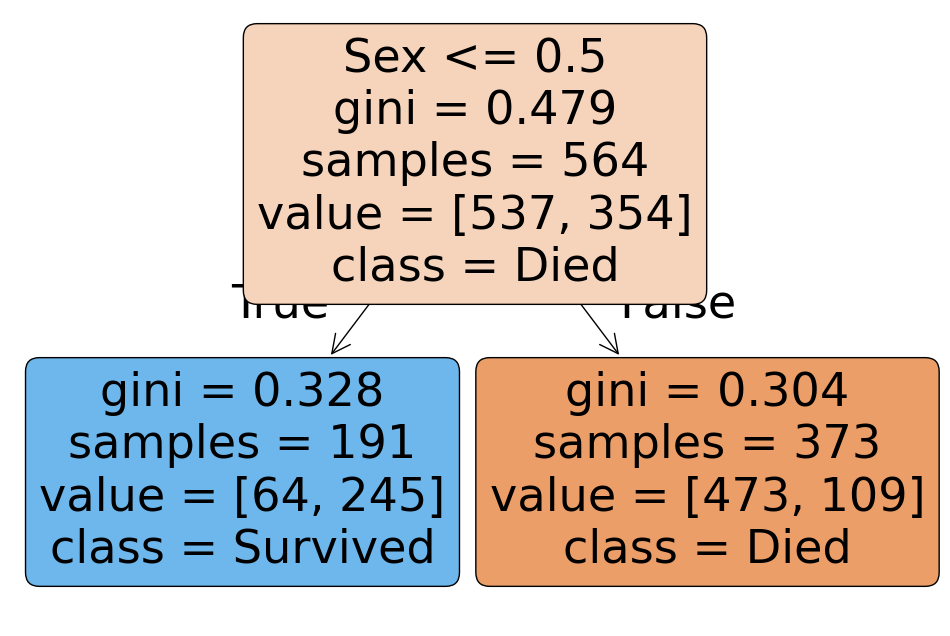

In [113]:
from sklearn import tree
estimator = rf_model.estimators_[0]

# Plot it
plt.figure(figsize=(12,8))
tree.plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=['Died','Survived'],
    filled=True,
    rounded=True
)
plt.show()